In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

import pandas as pd

In [2]:
linear_train_df = pd.read_csv('combined_data/linear_train_data.csv')
linear_val_df = pd.read_csv('combined_data/linear_val_data.csv')
linear_test_df = pd.read_csv('combined_data/linear_test_data.csv')
non_linear_train_df = pd.read_csv('combined_data//non_linear_train_data.csv')
non_linear_val_df = pd.read_csv('combined_data//non_linear_val_data.csv')
non_linear_test_df = pd.read_csv('combined_data//non_linear_test_data.csv')
overlapping_train_df = pd.read_csv('combined_data/overlapping_train_data.csv')
overlapping_val_df = pd.read_csv('combined_data/overlapping_val_data.csv')
overlapping_test_df = pd.read_csv('combined_data/overlapping_test_data.csv')

In [7]:
import numpy as np

def covariance_matrix(data):
    """
    Compute the covariance matrix for the given training data and convert it to σ^2I form.
    
    Parameters:
    data (numpy.ndarray): A 2D array where rows represent data points and columns represent features.

    Returns:
    cov_matrix (numpy.ndarray): The covariance matrix in the σ^2I form.
    """
    # Calculate the covariance matrix for the input data
    cov_matrix = np.cov(data, rowvar=False)

    print(cov_matrix)
    # Calculate the average of all the variances
    avg_variance = np.mean(np.diag(cov_matrix))

    # Create σ^2I form covariance matrix
    num_features = data.shape[1]
    sigma_squared_I = avg_variance * np.identity(num_features)

    return sigma_squared_I

# Example usage:
# Assuming you have a training dataset 'train_data' with shape (num_samples, num_features)
# cov_matrix = covariance_matrix(train_data)
# print(cov_matrix)


In [19]:
import numpy as np

def classwise_covariance_matrix(data, labels):
    """
    Compute class-wise covariance matrices, average them, and then diagonalize the resulting covariance matrix.

    Parameters:
    data (numpy.ndarray): A 2D array where rows represent data points, and columns represent features.
    labels (numpy.ndarray): A 1D array containing class labels corresponding to each data point.

    Returns:
    cov_matrix (numpy.ndarray): The diagonalized average covariance matrix.
    """
    unique_labels = np.unique(labels)
    num_features = data.shape[1]
    class_cov_matrices = []

    for label in unique_labels:
        class_data = data[labels == label]
        class_cov = np.cov(class_data, rowvar=False)
        class_cov_matrices.append(class_cov)

    avg_cov_matrix = np.mean(class_cov_matrices, axis=0)    
    avg_variance = np.mean(np.diag(avg_cov_matrix))
    sigma_squared_I = avg_variance * np.identity(num_features)

    return sigma_squared_I

In [20]:
train_data = linear_train_df[['X', 'Y']]
train_labels = linear_train_df['Label']
cov_matrix = classwise_covariance_matrix(train_data, train_labels)
print(cov_matrix)


[[3.67623702 0.        ]
 [0.         3.67623702]]


In [8]:
covariance_matrix(linear_train_df[['X', 'Y']])

[[28.20117088  1.84778146]
 [ 1.84778146 61.96117339]]


array([[45.08117213,  0.        ],
       [ 0.        , 45.08117213]])

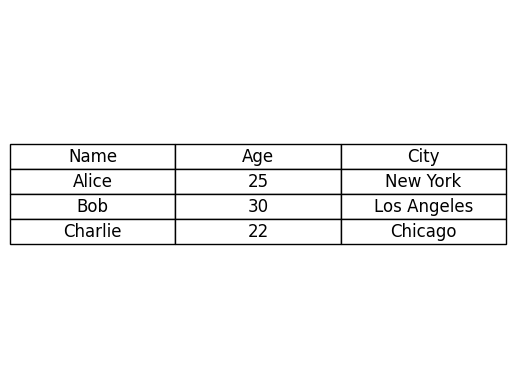

In [3]:
import matplotlib.pyplot as plt

# Sample data for the table
data = [
    ['Name', 'Age', 'City'],
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 22, 'Chicago'],
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the table and add it to the axis
table = ax.table(cellText=data, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the table size

# Hide axis labels and ticks (optional)
ax.axis('off')

# Display the plot
plt.show()


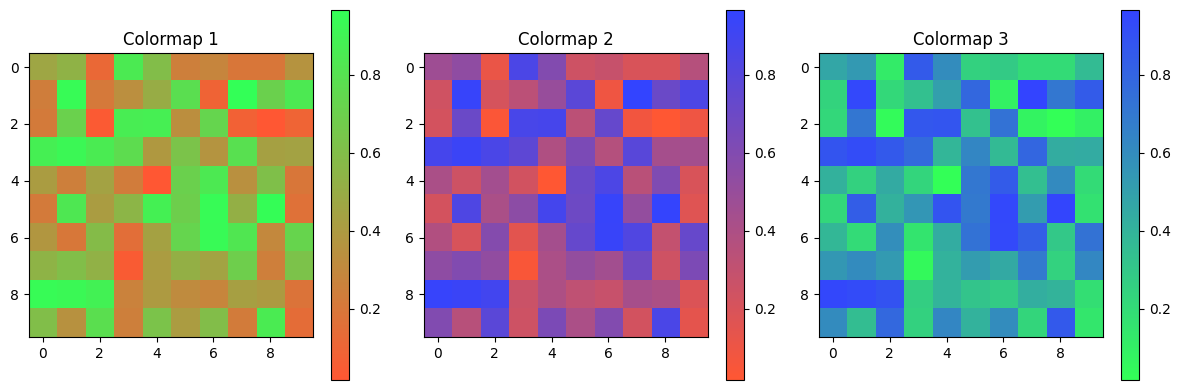

In [4]:
import matplotlib.colors as mcolors

# Define the color pairs
color_pairs = [('#FF5733', '#33FF57'), ('#FF5733', '#3344FF'), ('#33FF57', '#3344FF')]

# Create colormaps
colormaps = []
for color1, color2 in color_pairs:
    cmap_name = f'custom_{color1}_{color2}'
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, [color1, color2], N=256)
    colormaps.append(cmap)

# Example: Using the colormaps
import matplotlib.pyplot as plt
import numpy as np

# Create a sample data array
data = np.random.rand(10, 10)

# Plot using the custom colormaps
plt.figure(figsize=(12, 4))
for i, cmap in enumerate(colormaps, 1):
    plt.subplot(1, len(colormaps), i)
    plt.imshow(data, cmap=cmap)
    plt.colorbar()
    plt.title(f'Colormap {i}')

plt.tight_layout()
plt.show()


In [3]:
data = {
    'Height (inches)': [65, 70, 68, 72, 63],
    'Weight (lbs)': [150, 180, 160, 200, 140]
}

df = pd.DataFrame(data)

In [4]:
df

Height (inches)  Weight (lbs)
0               65           150
1               70           180
2               68           160
3               72           200
4               63           140

In [5]:
df.values

array([[ 65, 150],
       [ 70, 180],
       [ 68, 160],
       [ 72, 200],
       [ 63, 140]], dtype=int64)